<a href="https://colab.research.google.com/github/sonhyuncheol/AI/blob/master/foundation/chapter03_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **회귀(Regression)**

지도 학습 알고리즘은 크게 분류와 회귀로 나뉜다.

---

분류는 샘플을 몇 개의 클래스 중 하나로 분류하는 문제였다.

회귀는 임의의 숫자를 예측하는 문제로 정해진 클래스가 없고 임의의 수치를 출력한다.

---

이진분류에서는 타깃이 양성 클래스는 1, 음성 클래스는 0이었다.

회귀에서는 타깃이 임의의 숫자이다.

예를 들어서 농어의 무게를 예측한다고 하면 타깃은 농어의 무게가 되는 것이다.

즉, 예측하고자 하는 대상이 타깃이 된다,

---

분류에서는 타깃을 직접 만들어서 사용했다.

회귀에서는 타깃은 실제 데이터이다. 

그래서 이진분류와 다르게 타깃을 만들 필요가 없고, 훈련 데이터에 있는 열 중에 하나가 타깃 값이 된다. 즉, 어떤 특성값이 타깃이 되는 것이다.

회귀라는 용어는 19세기 통계학자이나 사회학자인 프랜시스 골턴(Francis Galton)이 처음 사용했다.

그가 쓴 논문에 키가 큰 사람의 아이가 부모보다 더 크지 않는다는 사실을 관찰하고 이를 평균으로 회귀한다라고 표현했다.

그 후 두 변수 사이의 상관관계를 분석하는 방법을 회귀라 불렀다.

# **k-최근접 이웃 회귀**

k-최근접 이웃 분류는 가장 가까운 샘플 k개를 선택하고, 이 샘플들의 클래스를 확인하여 다수 클래스를 새로운 샘플의 클래스로 예측했다.

---

k-최근접 이웃 회귀도 가장 가까운 샘플 k개를 선택한다.

회귀는 분류와 다르게 이웃한 샘플의 타깃값, 임의의 수치들의 평균을 구하면된다.

# **데이터 준비**

In [12]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

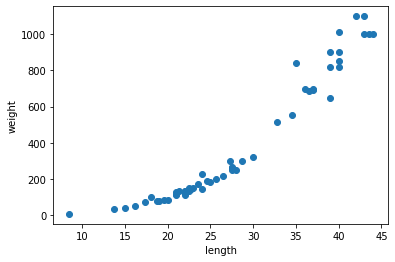

In [13]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

우리는 농어의 길이를 보고, 농어의 무게를 예측할 것이다.

그러므로 농어의 길이는 특성이고, 무게는 타깃이다.

In [14]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

사이킷런의 train_test_split() 함수를 사용해 훈련 세트와 테스트 세트로 나눈다.

이전에는 train_test_split() 함수에 stratify 매개변수에 타깃 데이터를 전달해서 클래스 비율에 맞게 골고루 섞었다.

하지만 이번에는 분류 문제가 아닌 회귀 문제이고, 임의의 숫자가 타깃이기 때문에 사용하지 않는다.

보통 회귀에서는 랜덤으로 섞어서 훈련 세트와 테스트 세트로 나누는 것이 일반적이다.

---

train_test_split() 함수에 perch_length를 전달하면 두 리스트는 1차원 배열이기 때문에 이를 나눠서 나온 train_input과 test_input도 1차원 배열로 결과가 나온다.

사이킷런의 모델들은 입력 데이터가 행 방향으로 샘플이 있고, 열 방향으로 특성이 있는 2차원 배열이라고 기대하고 있다.

이번 예제에서는 특성을 1개만 사용하므로 1개의 열이 있는 2차원 배열로 바꿔야한다.

In [15]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

배열의 모양을 바꿀 때, 크기를 바꿀 때 넘파이의 reshape() 메소드를 사용하면 된다.

첫 번째 행 차원을 -1로 지정하고, 두 번째 열 차원을 1로 지정했다.

---

행 차원을 -1로 지정하면 차원이 모두 결정되고, 남은 차원을 모두 행에 채운다.

열 차원을 1로 지정하면 하나의 열이 있는 배열이 만들어 진다.

reshape(-1, 1)과 같이 사용하면 배열의 전체 원소 개수를 매번 외우지 않아도 된다.

# **회귀 모델 훈련**

In [16]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [17]:
knr.score(test_input, test_target)

0.9928094061010639

사이키런에서 k-최근접 이웃 회귀 알고리즘을 구현한 클래스는 KNeighborsRegressor이다.

KNeighborsClassifier와 비슷하게 객체를 생성하고 fit()메소드로 모델을 훈련한다.

그리고 score()메소드로 테스트 세트를 전달해서 평가한다.

---

분류 문제에서는 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율, 즉, 정확도가 나왔다.

회귀 문제에서는 예측하는 값이나 타깃 모두 임의의 수치이기 때문에 정확한 숫자를 맞힌다는 것은 거의 불가능하다.

그래서 회귀 문제에서는 정확도대신 R^2(결정계수)라는 값이 나온다.

결정 계수의 계산 방식은 각 샘플의 타깃과 예측한 값의 차이를 제곱하여 더한다.

그 다음 타깃과 타깃 평균의 차이를 제곱하여 더한 값으로 나눈다.

마지막으로 1로 뺀다.

**R^2 = 1 - (타깃-예측)^2의 합 / (타깃-타깃평균)^2의 합**

---

만약 예측이 평균 정도라면 분모와 분자가 비슷해질 것이다. 그러면 결정 계수는 0에 가까운 값이 된다.

만약 예측이 타깃 정도라면 분자가 0에 가까워질 것이다. 그러면 결정 계수는 1에 가까운 값이 된다.

그래서 R^2는 0 ~ 1 사이의 값이 나온다.

R^2가 1에 가까울 수록 좋은 모델이고, 0에 가까울 수록 나쁜 모델이라고 판단한다.

---

※여기서 잠깐※

사이킷런의 score() 메소드가 출력하는 값은 높을 수록 좋은 것이다. 정확도나 결정계수도 마찬가지이다.

만약 score() 메소드가 에러율을 반환한다면 이를 음수로 만들어 실제로는 낮은 에러가 score() 메소드로 반환될 때는 높은 값이 되도록 바꾼다.

In [18]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만듭니다
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, test_prediction)

print(mae)

19.157142857142862


R^2(결정계수)말고도 다른 지표를 사용해서 모델을 성능을 평가할 수 있다.

특히 회귀모델같은 경우는 평균절대값오차(MAE) 혹은 평균제곱근오차(MSE)를 사용한다.

여기서는 MAE를 사용해보겠다.

---

특정 지표들은 사이킷런의 metrics 모듈 하위에 있다.

MAE는 사이킷런의 metrics 모듈 하위에 mean_absolute_error() 함수를 사용하면 된다.

mean_absolute_error() 함수에 첫 번째 매개변수로 테스트 세트의 target값과 두 번째 매개변수로 테스트 세트의 input으로 예측한 값을 전달하면된다.

mean_absolute_error는 타깃과 예측의 절대값 오차를 평균하여 반환한다.

---

결과로 약 19가 나왔다.

농어의 무게를 이 모델이 예측했는데 예측이 평균적으로 19g 정도 타깃값과 다르다, 오차가 난다는 것을 알 수 있다.

# **과대적합(Overfitting)과 과소적합(Underfitting)**

지금까지 훈련 세트를 사용해 모델을 훈련하고 테스트 세트로 모델을 평가했다.

맨 처음에는 훈련 세트로 평가를 했었다. 하지만 그 방법은 옳지 않은 평가 방법이라고 하고, 테스트 세트로 평가를 했다.

이번에는 훈련 세트와 테스트 세트 두 개 다 사용해서 평가해서 두 개를 다 사용했을 때 어떤 insight가 나올지 확인해보겠다.

In [19]:
print(knr.score(train_input, train_target))

0.9698823289099255


In [20]:
knr.score(test_input, test_target)

0.9928094061010639

머신러닝에서 훈련 세트와 테스트 세트로 적절하게 준비했다면 일반적으로 훈련 세트의 점수가 테스트 세트보다 높아야한다.

당연히 훈련 세트에서 모델을 훈련했으므로 훈련 세트에서 더 좋은 점수가 나와야한다.

하지만 테스트 세트의 점수가 더 높게 나왔다.

이런 현상을 훈련 세트를 적절히 학습하지 못했다. 과소적합되었다.라고 한다.

---

훈련 세트에서 점수가 높았지만 테스트 세트에서 점수가 낮다면 모델이 훈련 세트에 과대적합(overfitting)되었다고 말한다.

즉, 훈련 세트에만 잘 맞는 모델이라 테스트 세트나 나중에 실전에 투입하여 새로운 샘플에 대한 예측을 만들 때 잘 동작하지 않을 것이다.

훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 낮다면 모델이 훈련 세트에 과소적합(underfitting)되었다고 말한다.

즉, 모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않은 경우이다.

---

※ 여기서 잠깐 ※

과소적합이 일어나는 또 다른 이유는 훈련 세트와 테스트 세트의 크기가 매우 작기 때문이다.

데이터가 작으면 테스트 세트가 훈련 세트의 특징을 따르지 못할 수도 있다.

In [21]:
# 이웃의 갯수를 3으로 설정합니다
knr.n_neighbors = 3

# 모델을 다시 훈련합니다
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


과소적합을 해결하기 위해서는 모델을 복잡하게 만들면 된다.

즉 훈련 세트에 더 잘 맞게 모델을 만들면 테스트 세트의 점수는 낮아질 것이다.

k-최근접 이웃 알고리즘으로 모델을 복잡하게 만드는 방법은 이웃의 개수 k를 줄이는 것이다.

---

k-최근접 이웃 알고리즘에서 k의 개수가 커지면 과소적합 k의 개수가 작아지면 
과대적합이 일어난다.

이웃의 개수를 줄이면 훈련 세트에 있는 국지적인 패턴에 민감해지고, 이웃의 개수를 늘리면 데이터 전반에 있는 일반적인 패턴을 따를 것이다.

예를 들어서 k를 1로 지정하면 가까운 이웃 하나만 고려하기 때문에 훈련 세트의 전체적인 경향을 따르지 못하고, 샘플 하나하나에 따라가는 들쭉날쭉한 예측을 만들어낸다.

---

이전에 설명한 것처럼 사이킷런의 k-최근접 이웃 클래스는 이웃의 개수를 바꾸는 방법려면 n_neighbors 속성값을 바꾸면 된다.

In [22]:
print(knr.score(test_input, test_target))

0.974645996398761


테스트 세트의 점수가 훈련 세트보다 낮아졌으므로 과소적합 문제를 해결하였다.

---

최적의 k값은 문제마다 변화한다. 최적의 k값을 찾는 방법은 다음에 알아보겠다.

이런 k값 같은 우리가 지정해야하는 매개변수를 하이퍼파라미터라고 한다.

하이퍼파라미터는 클래스나 함수의 매개변수로 지정할 수 있게 끔 되어있다.